# Yandex.Afisha Marketing Expense Optimization Analysis

##### This notebook contains server logs with data on Yandex.Afisha visits from June 2017 through May 2018, along with a dump file for the period and expense statistics.

##### We will use this data to study how people use the product, when they start to buy, how much money each customer brings, and when customers 'pay off' in terms of LTV.

##### Finally, at the end of the report we will use our data insights to help the marketing team understand where their budget is best spent.

In [1]:
!pip install sidetable


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [44]:
# Let's begin by importing basic libraries that we'll need
import pandas as pd
import numpy as np
from datetime import datetime
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


In [45]:
# let's read in our first dataset
try:
    visits = pd.read_csv('/datasets/visits_log_us.csv')
except:
    visits = pd.read_csv('visits_log_us.csv')

In [46]:
# we want to see how memory-intensive these datasets are
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


In [47]:
# let's find missing values!
visits.stb.missing(style=True)

In [48]:
# and we'll check for duplicate values
visits.duplicated().sum()

0

In [49]:
visits['Device'].value_counts()

desktop    262567
touch       96833
Name: Device, dtype: int64

In [50]:
visits['Device'] = visits['Device'].astype('category')

In [51]:
visits.head(10)

Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
5  desktop  2017-09-03 21:36:00          5  2017-09-03 21:35:00   
6  desktop  2018-01-30 12:09:00          1  2018-01-30 11:13:00   
7    touch  2017-11-05 15:15:00          3  2017-11-05 15:14:00   
8  desktop  2017-07-19 10:44:00          3  2017-07-19 10:41:00   
9  desktop  2017-11-08 13:43:00          5  2017-11-08 13:42:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  
5  16007536194108375387  
6   6661610529277171451  
7  11423865690854540312  
8   2987360259350925644  
9   1289240080042562063

In [52]:
# let's see how much memory we saved in memory usage
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   Device     359400 non-null  category
 1   End Ts     359400 non-null  object  
 2   Source Id  359400 non-null  int64   
 3   Start Ts   359400 non-null  object  
 4   Uid        359400 non-null  uint64  
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


In [53]:
# not a lot of memory was saved. Let's move on to other object columns
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])

In [54]:
# Massive savings in memory! Last thing - let's make columns lowercase.
visits.columns = visits.columns.str.lower()
visits.head(5)

device              end ts  source id            start ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

In [55]:
visits['week'] = visits['start ts'].astype('datetime64[W]')
visits['month'] = visits['start ts'].astype('datetime64[M]')
visits['year'] = visits['start ts'].dt.year

visits.head()

device              end ts  source id            start ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid                week               month  year  
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:20:00  2017  
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 16:53:00  2018  
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00  2017  
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 10:59:00  2018  
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00  2017

In [56]:
# moving on to the next dataset: orders
try:
    orders = pd.read_csv('/datasets/orders_log_us.csv')
except:
    orders = pd.read_csv('orders_log_us.csv')
orders.info(memory_usage='deep')
orders.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450
5  2017-06-01 08:43:00     0.18  10402394430196413321
6  2017-06-01 08:54:00     1.83  12464626743129688638
7  2017-06-01 09:22:00     1.22   3644482766749211722
8  2017-06-01 09:22:00     3.30  17542070709969841479
9  2017-06-01 09:23:00     0.37   1074355127080856382

In [57]:
# slightly smaller dataset, but still using object columns. Let's make Buy Ts dtype datetime
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'], format="%Y.%m.%d %H:%M")
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [58]:
# let's make these columns lowercase as well
orders.columns = orders.columns.str.lower()
orders.head(3)

buy ts  revenue                   uid
0 2017-06-01 00:10:00    17.00  10329302124590727494
1 2017-06-01 00:25:00     0.55  11627257723692907447
2 2017-06-01 00:27:00     0.37  17903680561304213844

In [59]:
# checking for missing values
orders.stb.missing(style=True)

In [60]:
# checking for duplicates
orders.duplicated().sum()

0

In [61]:
# nice! This dataset is workable now. Let's move on to the last one!
try:
    costs = pd.read_csv('/datasets/costs_us.csv')
except:
    costs = pd.read_csv('costs_us.csv')
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


In [62]:
# another object column taking up too much space. Let's take a look at what dt entails
costs.head(10)

source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08
5          1  2017-06-06  40.39
6          1  2017-06-07  40.59
7          1  2017-06-08  56.63
8          1  2017-06-09  40.16
9          1  2017-06-10  43.24

In [63]:
# dt is a datetime column. Let's make that column datetime format
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info(memory_usage='deep')
costs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


source_id         dt  costs
0          1 2017-06-01  75.20
1          1 2017-06-02  62.25
2          1 2017-06-03  36.53
3          1 2017-06-04  55.00
4          1 2017-06-05  57.08

In [64]:
# let's change source_id to category
costs['source_id'] = costs['source_id'].astype('category')

In [65]:
costs['year'] = costs['dt'].astype('datetime64[Y]')
costs['month'] = costs['dt'].astype('datetime64[M]')
costs['week'] = costs['dt'].astype('datetime64[W]')

In [66]:
# checking costs for missing values
costs.stb.missing(style=True)

In [67]:
# checking costs for duplicates
costs.duplicated().sum()

0

In [68]:
costs.head()

source_id         dt  costs       year      month       week
0         1 2017-06-01  75.20 2017-06-01 2017-06-01 2017-06-01
1         1 2017-06-02  62.25 2017-06-02 2017-06-02 2017-06-02
2         1 2017-06-03  36.53 2017-06-03 2017-06-03 2017-06-03
3         1 2017-06-04  55.00 2017-06-04 2017-06-04 2017-06-04
4         1 2017-06-05  57.08 2017-06-05 2017-06-05 2017-06-05

In [69]:
# let's rename columns for clarity and consistency
visits = visits.rename(columns={'Device': 'device',
                                'end ts': 'end_ts',
                                'source id': 'source_id',
                                'start ts': 'start_ts',
                                'uid': 'uid'})
orders = orders.rename(columns={'buy ts': 'buy_ts',
                                'revenue': 'revenue',
                                'uid': 'uid'})
costs = costs.rename(columns={'dt':'date'})

In [70]:
# awesome. We can work with this!

#### Conclusion

#### We've successfully loaded in our databases. Here are our parameters:

##### The visits table (server logs with data on website visits):
###### Uid — user's unique identifier
###### Device — user's device
###### Start Ts — session start date and time
###### End Ts — session end date and time
###### Source Id — identifier of the ad source the user came from
###### All dates in this table are in YYYY-MM-DD format.

##### The orders table (data on orders):
###### Uid — unique identifier of the user making an order
###### Buy Ts — order date and time
###### Revenue — Yandex.Afisha's revenue from the order

##### The costs table (data on marketing expenses):
###### source_id — ad source identifier
###### dt — date
###### costs — expenses on this ad source on this day

#### We checked for any duplicate / missing values, and changed datatypes to save memory and make further data analysis easier. We also created additional columns to help us with our analysis.

## How many people use Yandex.Afisha every day, week and month?

In [71]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid                week               month  year  
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:20:00  2017  
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 16:53:00  2018  
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00  2017  
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 10:59:00  2018  
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00  2017

In [72]:
visits['session_date'] = visits['start_ts'].dt.date
visits['session_dow'] = visits['start_ts'].dt.day_name()
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_year'] = visits['start_ts'].dt.isocalendar().year
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid                week               month  year  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:20:00  2017   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 16:53:00  2018   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00  2017   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 10:59:00  2018   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00  2017   

  session_date session_dow        session_week       session_month  \
0   2017-12-20   Wednesday 2017-12-20 17:20:00 2017-12-20 17:20:00   
1   2018-02-19      Monday 2018-02-19 16:53:00 2018-02-19 16:53:00   
2   2017-07-01    Saturday 2017-07-01 01:54:00 2017-07-01 01:54:00   
3   2018-05-20      Sunday 2018-05-20 10:59:00 2018-05-20 10:59:00   
4   2017-12-27   Wednesday 2017-12-27 14:06:00 2017-12-27 14:06:00   

   session_year  
0          2017  
1          2018  
2          2017  
3          2018  
4          2017

In [73]:
# we'll dive into the visits dataframe for this.
# here's the calculation for users per day - we want to sum up the unique users for each time period
dau = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()

# here's the calculation for users per week
wau = visits.groupby('session_week').agg({'uid': 'nunique'}).mean()

# here's the calculation for users per month
mau = visits.groupby('session_month').agg({'uid': 'nunique'}).mean()

print('Number of users per day (DAU):', dau)
print('Number of users per week (WAU):', wau)
print('Number of users per month (MAU):', mau)


Number of users per day (DAU): uid    907.991758
dtype: float64
Number of users per week (WAU): uid    1.602292
dtype: float64
Number of users per month (MAU): uid    1.602292
dtype: float64


In [74]:
# we'll use our data to plot graphs for DAU, WAU, and MAU

dau_total = int(visits.groupby('session_date').agg({'uid':'nunique'}).mean())
wau_total = int(visits.groupby('session_week').agg({'uid':'nunique'}).mean())
mau_total = int(visits.groupby('session_month').agg({'uid':'nunique'}).mean())


In [75]:
daily_usage = visits.groupby('session_date').agg({'uid':'nunique'}).reset_index()

plt.figure(figsize = (20,7))
plt.plot(
    daily_usage['session_date'],
    daily_usage['uid']
)
plt.axhline(dau_total, color='r', linestyle='--', label = 'Avg. DAU')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.title('Active Users per Day', fontsize=20)
plt.legend()
plt.show()

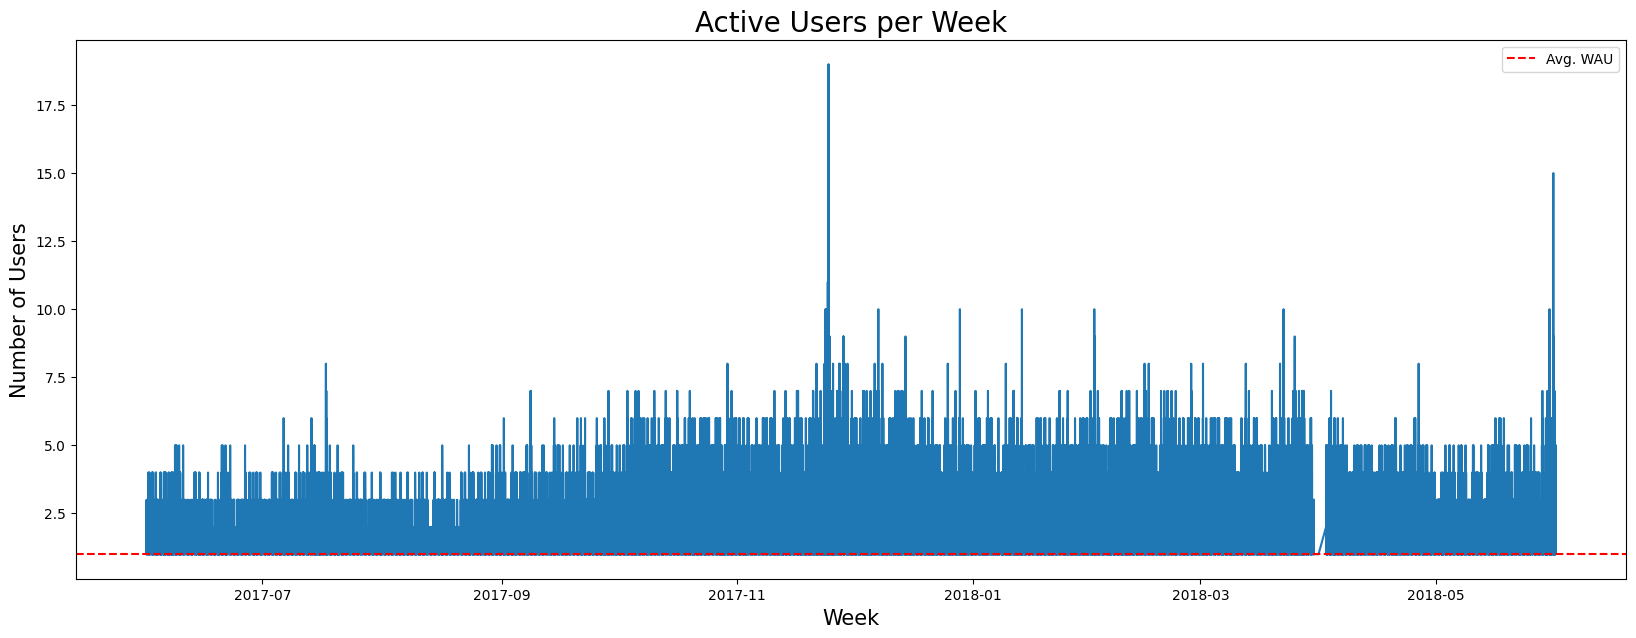

In [76]:
weekly_users = visits.groupby('session_week').agg({'uid':'nunique'}).reset_index()

plt.figure(figsize = (20,7))
plt.plot(
    weekly_users['session_week'],
    weekly_users['uid']
)
plt.axhline(wau_total, color='r', linestyle='--', label = 'Avg. WAU')
plt.xlabel('Week', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.title('Active Users per Week', fontsize=20)
plt.legend()
plt.show()

In [77]:
# Grouping data by month and aggregating total unique users.
monthly_usage = visits.groupby('session_month').agg({'uid':'nunique'}).reset_index()

# Showing the data in form of line plot.
plt.figure(figsize=(20,7))
plt.plot(
    monthly_usage['session_month'],
    monthly_usage['uid']
)
plt.axhline(mau_total, color='r', linestyle='--', label = 'Avg. MAU')
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of Users', fontsize=15)
plt.title('Active Users per Month', fontsize=20)
plt.legend()
plt.show()

#### Conclusion

##### We found the DAU, WAU, and MAU and plotted each of them. It's clear that our highest usage occurs in the winter months - November is the month with the highest usage. Summer months see about half the active users compared to winter months. Should we lean into campaigning in the winter months, or is there a promotion we can run to increase usage in the summer months?

<div class="alert alert-block alert-info">
<b>Plotted standard plots, and graphs in chronological order!</b> <a class="tocSkip"></a>
</div>

## How many sessions are there per day?

In [78]:
# we'll group data by session date can count the total unique users
daily_sessions = int(visits.groupby('session_date').agg({'uid': 'count'}).mean())
print('On average, there are', daily_sessions, 'sessions each day.')

On average, there are 987 sessions each day.


In [79]:
# Let's plot this across days of the week.

sessions_per_user = visits.groupby(['session_year', 'session_month']).agg({'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions']/sessions_per_user['n_users']
print(sessions_per_user)


                                  n_sessions  n_users  sessions_per_user
session_year session_month                                              
2017         2017-06-01 00:01:00           1        1                1.0
             2017-06-01 00:02:00           2        2                1.0
             2017-06-01 00:04:00           1        1                1.0
             2017-06-01 00:09:00           1        1                1.0
             2017-06-01 00:14:00           3        3                1.0
...                                      ...      ...                ...
2018         2018-05-31 23:54:00           5        5                1.0
             2018-05-31 23:56:00           1        1                1.0
             2018-05-31 23:57:00           2        2                1.0
             2018-05-31 23:58:00           1        1                1.0
             2018-05-31 23:59:00           5        5                1.0

[224303 rows x 3 columns]


In [80]:
visits.head()

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid                week               month  year  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:20:00  2017   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 16:53:00  2018   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00  2017   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 10:59:00  2018   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00  2017   

  session_date session_dow        session_week       session_month  \
0   2017-12-20   Wednesday 2017-12-20 17:20:00 2017-12-20 17:20:00   
1   2018-02-19      Monday 2018-02-19 16:53:00 2018-02-19 16:53:00   
2   2017-07-01    Saturday 2017-07-01 01:54:00 2017-07-01 01:54:00   
3   2018-05-20      Sunday 2018-05-20 10:59:00 2018-05-20 10:59:00   
4   2017-12-27   Wednesday 2017-12-27 14:06:00 2017-12-27 14:06:00   

   session_year  
0          2017  
1          2018  
2          2017  
3          2018  
4          2017

In [81]:
# list of month's to use in charts:
months = [
    '06/2017',
    '07/2017',
    '08/2017',
    '09/2017',
    '10/2017',
    '11/2017',
    '12/2017',
    '01/2018',
    '02/2018',
    '03/2018',
    '04/2018',
    '05/2018'
]

ValueError: x and y must have same first dimension, but have shapes (12,) and (224303,)

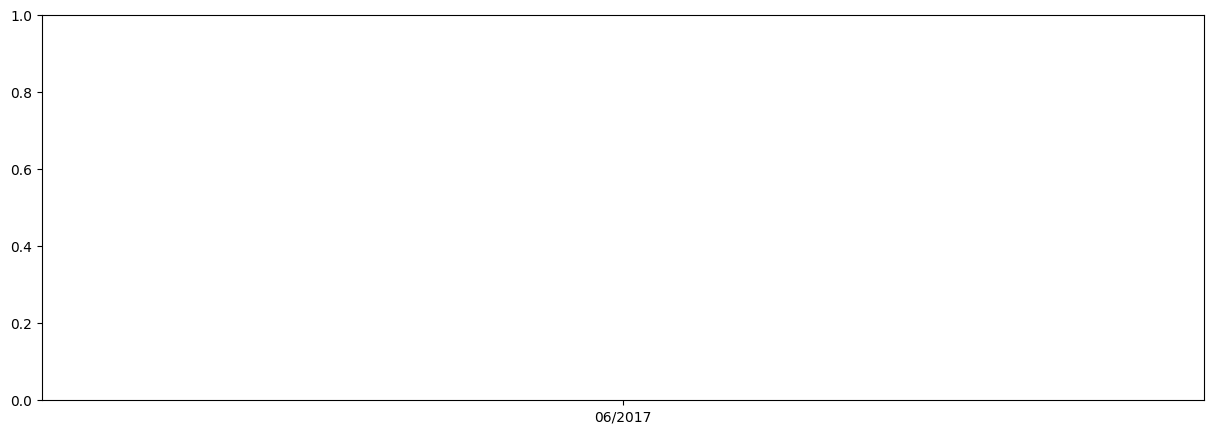

In [82]:
# Plot the sessions per user across days of the week
plt.figure(figsize=(15, 5))
plt.plot(
    months,
    sessions_per_user['sessions_per_user']
)
plt.xlabel('Day of the Week')
plt.ylabel('Sessions per User')
plt.title('Sessions per User Over Time (Months)')
plt.show()

#### Conclusion

##### Like we saw above, our product sees more usage during the winter months - existing users have more sessions during the winter months, and have less sessions during the summer months. Sessions per user float between 1.2 - 1.4, so typically our users use our product about once per month. What can we do to convince users to come back more than once a month? Attacking the summer months seems like low-hanging fruit for a promotion of some sort.

## What is the length of each session?

In [ ]:
# let's subtract start_ts from end_ts and create a new column
visits['session_length'] = visits['end_ts'] - visits['start_ts']

# Group by day of the week and calculate average session length
avg_session_length = visits['session_length'].mean()

# Convert session length to total seconds
session_length_seconds_total = avg_session_length.seconds
session_length_minutes = (session_length_seconds_total % 3600) // 60
session_length_seconds = session_length_seconds_total % 60

print('The average session length is', session_length_minutes, 'minutes and', session_length_seconds, 'seconds.')

The average session length is 10 minutes and 43 seconds.


In [ ]:
# let's make sure the session_length column is the correct datatype
visits['session_length'] = ((visits['session_length'] / np.timedelta64 (1, 's')).round()).astype(int)

In [ ]:
# Grouping data by Date and aggregating the mean session length.
session_by_date = visits.groupby('session_date').agg({'session_length': 'mean'}).reset_index()

In [ ]:
# Showing the data in form of bar chart.
plt.figure(figsize=(20,7))
plt.plot(
    session_by_date['session_date'],
    session_by_date['session_length'],
)
plt.axhline(avg_session_length.seconds,color='r', linestyle='--', label = 'Avg. Session Length')
plt.xlabel('Date', fontsize=15)
plt.ylabel ('Avg. Session Length (in seconds)', fontsize=15)
plt.title('Session Length by Date', fontsize=20)
plt.legend()
plt.show()


In [ ]:
# adding a histogram displaying distribution of session length

visits['session_length'].hist()

<AxesSubplot:>

#### Conclusion

##### More time is spent by users during the week, than the weekend. Friday has the longest session on average, and Sunday has the shortest!

## What's the user retention rate?

In [ ]:
# we'll find the first session for each user, named min_visit

min_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
min_visit.columns = ['uid', 'first_session']
min_visit['cohort'] = min_visit['first_session']
min_visit.head()

uid       first_session              cohort
0   11863502262781 2018-03-01 17:27:00 2018-03-01 17:27:00
1   49537067089222 2018-02-06 15:55:00 2018-02-06 15:55:00
2  297729379853735 2017-06-07 18:47:00 2017-06-07 18:47:00
3  313578113262317 2017-09-18 22:49:00 2017-09-18 22:49:00
4  325320750514679 2017-09-30 14:29:00 2017-09-30 14:29:00

In [ ]:
# confirming all uids are unique
print( min_visit.shape )

print(len(visits.uid.unique()))


(228169, 3)
228169


In [ ]:
# now we'll merge that dataset to the original dataset
visits2 = visits.merge(min_visit, how='inner', on=['uid'])
visits2.shape

(359400, 16)

In [ ]:
visits2.head(3)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   

                    uid       week      month  year session_date session_dow  \
0  16879256277535980062 2017-12-14 2017-12-01  2017   2017-12-20   Wednesday   
1    104060357244891740 2018-02-15 2018-02-01  2018   2018-02-19      Monday   
2   7459035603376831527 2017-06-29 2017-07-01  2017   2017-07-01    Saturday   

  session_week session_month  session_year  session_length  \
0   2017-12-14    2017-12-01          2017            1080   
1   2018-02-15    2018-02-01          2018            1680   
2   2017-06-29    2017-07-01          2017               0   

        first_session              cohort  
0 2017-12-20 17:20:00 2017-12-20 17:20:00  
1 2018-02-19 16:53:00 2018-02-19 16:53:00  
2 2017-07-01 01:54:00 2017-07-01 01:54:00

In [ ]:
visits2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359400 entries, 0 to 359399
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   device          359400 non-null  category      
 1   end_ts          359400 non-null  datetime64[ns]
 2   source_id       359400 non-null  int64         
 3   start_ts        359400 non-null  datetime64[ns]
 4   uid             359400 non-null  uint64        
 5   week            359400 non-null  datetime64[ns]
 6   month           359400 non-null  datetime64[ns]
 7   year            359400 non-null  int64         
 8   session_date    359400 non-null  object        
 9   session_dow     359400 non-null  object        
 10  session_week    359400 non-null  datetime64[ns]
 11  session_month   359400 non-null  datetime64[ns]
 12  session_year    359400 non-null  UInt32        
 13  session_length  359400 non-null  int64         
 14  first_session   359400 non-null  dat

Now we're moving into cohort analysis. Our cohorts and age calculations will be done from a monthly perspective.

We have two parameters:

Cohort: monthly cohort when the user registered/had first session.

age: difference between current session and first_session (kept in 'month' units)

In [ ]:
visits2['cohort'] = visits2['cohort'].astype('datetime64[M]')
visits2['first_session_month'] = visits2['first_session'].astype('datetime64[M]')
visits2['start_ts_month'] = visits2['start_ts'].astype('datetime64[M]')

visits2['age'] = ((pd.to_datetime(visits2['start_ts_month'])\
                 - pd.to_datetime(visits2['first_session_month'])) /  \
                 np.timedelta64(1, 'M')).round().astype('int')
visits2.head(10)

device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
5  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   
6  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
7  desktop 2017-10-27 16:02:00          3 2017-10-27 15:20:00   
8  desktop 2017-09-04 17:56:00          4 2017-09-04 17:37:00   
9  desktop 2017-10-28 00:04:00          3 2017-10-27 23:56:00   

                    uid       week      month  year session_date session_dow  \
0  16879256277535980062 2017-12-14 2017-12-01  2017   2017-12-20   Wednesday   
1    104060357244891740 2018-02-15 2018-02-01  2018   2018-02-19      Monday   
2   7459035603376831527 2017-06-29 2017-07-01  2017   2017-07-01    Saturday   
3  16174680259334210214 2018-05-17 2018-05-01  2018   2018-05-20      Sunday   
4  16174680259334210214 2018-03-08 2018-03-01  2018   2018-03-09      Friday   
5   9969694820036681168 2017-12-21 2017-12-01  2017   2017-12-27   Wednesday   
6  16007536194108375387 2017-08-31 2017-09-01  2017   2017-09-03      Sunday   
7  16007536194108375387 2017-10-26 2017-10-01  2017   2017-10-27      Friday   
8  16007536194108375387 2017-08-31 2017-09-01  2017   2017-09-04      Monday   
9  16007536194108375387 2017-10-26 2017-10-01  2017   2017-10-27      Friday   

  session_week session_month  session_year  session_length  \
0   2017-12-14    2017-12-01          2017            1080   
1   2018-02-15    2018-02-01          2018            1680   
2   2017-06-29    2017-07-01          2017               0   
3   2018-05-17    2018-05-01          2018            1440   
4   2018-03-08    2018-03-01          2018            1680   
5   2017-12-21    2017-12-01          2017               0   
6   2017-08-31    2017-09-01          2017              60   
7   2017-10-26    2017-10-01          2017            2520   
8   2017-08-31    2017-09-01          2017            1140   
9   2017-10-26    2017-10-01          2017             480   

        first_session     cohort first_session_month start_ts_month  age  
0 2017-12-20 17:20:00 2017-12-01          2017-12-01     2017-12-01    0  
1 2018-02-19 16:53:00 2018-02-01          2018-02-01     2018-02-01    0  
2 2017-07-01 01:54:00 2017-07-01          2017-07-01     2017-07-01    0  
3 2018-03-09 20:05:00 2018-03-01          2018-03-01     2018-05-01    2  
4 2018-03-09 20:05:00 2018-03-01          2018-03-01     2018-03-01    0  
5 2017-12-27 14:06:00 2017-12-01          2017-12-01     2017-12-01    0  
6 2017-09-03 21:35:00 2017-09-01          2017-09-01     2017-09-01    0  
7 2017-09-03 21:35:00 2017-09-01          2017-09-01     2017-10-01    1  
8 2017-09-03 21:35:00 2017-09-01          2017-09-01     2017-09-01    0  
9 2017-09-03 21:35:00 2017-09-01          2017-09-01     2017-10-01    1

In [ ]:
# now we can see how many users were active from certain cohorts after registration

cohorts = visits2.pivot_table(
    index='cohort',
    columns='age',
    values='uid',
    aggfunc='nunique'
).fillna(0)

cohorts

age              0       1       2       3      4      5      6      7   \
cohort                                                                    
2017-06-01  13259.0  1043.0   713.0   814.0  909.0  947.0  809.0  766.0   
2017-07-01  13140.0   737.0   674.0   738.0  765.0  633.0  596.0  601.0   
2017-08-01  10181.0   783.0   640.0   639.0  510.0  448.0  370.0  402.0   
2017-09-01  16704.0  1428.0  1156.0   847.0  658.0  632.0  599.0  404.0   
2017-10-01  25977.0  2042.0  1357.0  1012.0  890.0  837.0  555.0  529.0   
2017-11-01  27248.0  2133.0  1202.0  1054.0  919.0  638.0  594.0    0.0   
2017-12-01  25268.0  1410.0   960.0   786.0  512.0  481.0    0.0    0.0   
2018-01-01  22624.0  1351.0   890.0   565.0  458.0    0.0    0.0    0.0   
2018-02-01  22197.0  1267.0   565.0   446.0    0.0    0.0    0.0    0.0   
2018-03-01  20589.0   861.0   557.0     0.0    0.0    0.0    0.0    0.0   
2018-04-01  15709.0   760.0     0.0     0.0    0.0    0.0    0.0    0.0   
2018-05-01  15273.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0   

age            8      9      10     11  
cohort                                  
2017-06-01  694.0  674.0  539.0  596.0  
2017-07-01  510.0  376.0  361.0    0.0  
2017-08-01  284.0  265.0    0.0    0.0  
2017-09-01  381.0    0.0    0.0    0.0  
2017-10-01    0.0    0.0    0.0    0.0  
2017-11-01    0.0    0.0    0.0    0.0  
2017-12-01    0.0    0.0    0.0    0.0  
2018-01-01    0.0    0.0    0.0    0.0  
2018-02-01    0.0    0.0    0.0    0.0  
2018-03-01    0.0    0.0    0.0    0.0  
2018-04-01    0.0    0.0    0.0    0.0  
2018-05-01    0.0    0.0    0.0    0.0

In [ ]:
retention = cohorts.iloc[:,0:].div(cohorts[0], axis=0)
retention

age          0         1         2         3         4         5         6   \
cohort                                                                        
2017-06-01  1.0  0.078664  0.053775  0.061392  0.068557  0.071423  0.061015   
2017-07-01  1.0  0.056088  0.051294  0.056164  0.058219  0.048174  0.045358   
2017-08-01  1.0  0.076908  0.062862  0.062764  0.050093  0.044004  0.036342   
2017-09-01  1.0  0.085489  0.069205  0.050706  0.039392  0.037835  0.035860   
2017-10-01  1.0  0.078608  0.052239  0.038958  0.034261  0.032221  0.021365   
2017-11-01  1.0  0.078281  0.044113  0.038682  0.033727  0.023415  0.021800   
2017-12-01  1.0  0.055802  0.037993  0.031107  0.020263  0.019036  0.000000   
2018-01-01  1.0  0.059715  0.039339  0.024973  0.020244  0.000000  0.000000   
2018-02-01  1.0  0.057080  0.025454  0.020093  0.000000  0.000000  0.000000   
2018-03-01  1.0  0.041818  0.027053  0.000000  0.000000  0.000000  0.000000   
2018-04-01  1.0  0.048380  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-05-01  1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

age               7         8         9         10        11  
cohort                                                        
2017-06-01  0.057772  0.052342  0.050833  0.040652  0.044951  
2017-07-01  0.045738  0.038813  0.028615  0.027473  0.000000  
2017-08-01  0.039485  0.027895  0.026029  0.000000  0.000000  
2017-09-01  0.024186  0.022809  0.000000  0.000000  0.000000  
2017-10-01  0.020364  0.000000  0.000000  0.000000  0.000000  
2017-11-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2017-12-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-02-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-03-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-04-01  0.000000  0.000000  0.000000  0.000000  0.000000  
2018-05-01  0.000000  0.000000  0.000000  0.000000  0.000000

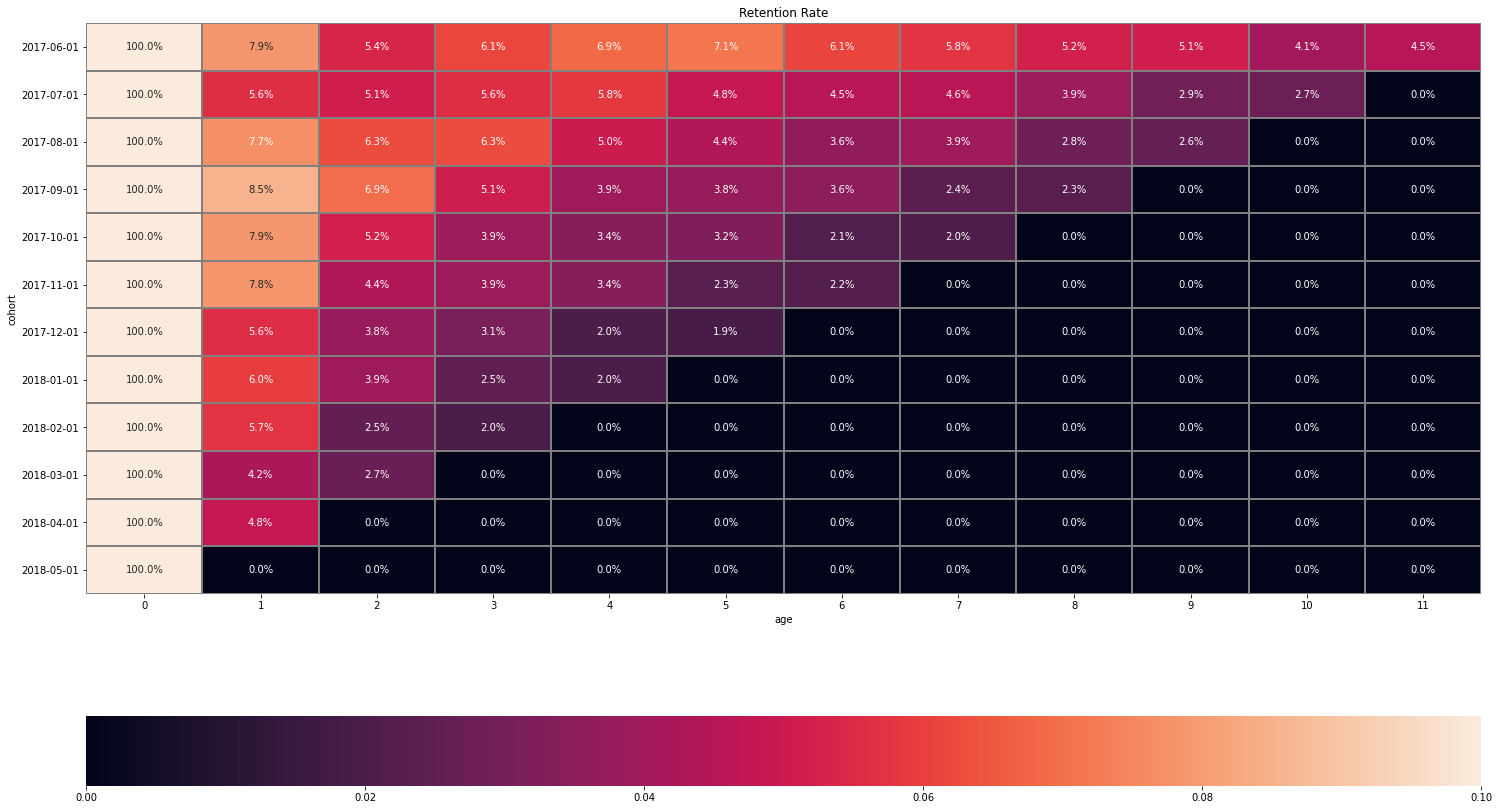

In [ ]:
# now we can visualize it!

retention.index = retention.index.astype(str)
plt.figure(figsize=(25, 15))
sns.heatmap(retention,
            annot=True,
            fmt='.1%',
            linewidths=1,
            linecolor='grey',
            vmax=0.1,\
            cbar_kws= {'orientation': 'horizontal'}).set(title = 'Retention Rate')

plt.show()

#### Conclusion

##### Here we found each user's first session. We added that to our visits dataframe (renamed visits2) and calculated the user's 'age' by subtracting the order month from the first month of activity.

##### We used this information to create a pivot table, which gave us the information we needed on retention rates!

##### Our month 2 retention has been trending downward. We need to figure out why we have less retenion from the 2018-04 cohort than the 2017-06 cohort!

## When do people start buying?

In [ ]:
# creating the first order

first_order = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_order.columns = ['uid', 'first_buy_ts']

display( first_order.head() )

print(visits2.shape )
visits_3 = visits2.merge(first_order, on='uid' )
print(visits_3.shape)

uid        first_buy_ts
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00

(359400, 19)
(97394, 20)


In [ ]:
# we'll calculate average conversion time

visits_3['conversion']=((pd.to_datetime(visits_3['first_buy_ts'])-pd.to_datetime(visits_3['first_session']))/np.timedelta64(1,'D')).astype('int')

In [ ]:
# now we can plot it

fig = px.histogram(visits_3, x="conversion", nbins=35)
fig.show()

In [ ]:
# What is our median conversion time?

print("The median conversion is:", visits_3['conversion'].median(), "days")

The median conversion is: 1.0 days


#### Conclusion

##### We are looking to find the average time it takes for a user to convert from a user -> buyer. We calculated the date of the first order, and subtracted the first visit date. Then we plotted the conversion rate on a histogram! The vast majority of users converted to buyers within 3 weeks.

## How many orders do they make during a given period of time?

In [ ]:
orders = orders.merge(first_order, on='uid' )

In [ ]:
orders.head()

buy_ts  revenue                   uid        first_buy_ts
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00

In [ ]:
orders['first_buy_ts_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_buy_ts_month  
0         2017-06-01  
1         2017-06-01  
2         2017-06-01  
3         2017-06-01  
4         2017-06-01

In [ ]:
cohort_sizes = orders.groupby(['first_buy_ts_month'])['uid'].nunique().reset_index()
cohort_sizes.columns = ['first_buy_ts_month', 'uid']

cohort_sizes.head()

first_buy_ts_month   uid
0         2017-06-01  2023
1         2017-07-01  1923
2         2017-08-01  1370
3         2017-09-01  2581
4         2017-10-01  4340

In [ ]:
orders['buy_ts_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_buy_ts_month buy_ts_month  
0         2017-06-01   2017-06-01  
1         2017-06-01   2017-06-01  
2         2017-06-01   2017-06-01  
3         2017-06-01   2017-06-01  
4         2017-06-01   2017-06-01

In [ ]:
# we can now use this to calculate the number of purchases for cohort and month

cohort = orders.groupby(['buy_ts_month', 'first_buy_ts_month'])['revenue'].count().reset_index()
cohort.columns = ['buy_ts_month', 'first_buy_ts_month', 'orders']


# now let's merge cohort with cohort_size
cohort = pd.merge(cohort, cohort_sizes, on='first_buy_ts_month')
cohort['age_month'] = ((cohort['buy_ts_month'] - cohort['first_buy_ts_month']) / np.timedelta64(1,'M')).round()
cohort['orders_per_buyer'] = cohort['orders']/cohort['uid']
cohort.head()

buy_ts_month first_buy_ts_month  orders   uid  age_month  orders_per_buyer
0   2017-06-01         2017-06-01    2354  2023        0.0          1.163618
1   2017-07-01         2017-06-01     177  2023        1.0          0.087494
2   2017-08-01         2017-06-01     174  2023        2.0          0.086011
3   2017-09-01         2017-06-01     226  2023        3.0          0.111715
4   2017-10-01         2017-06-01     292  2023        4.0          0.144340

In [ ]:
cohort_pivot = cohort.pivot_table(
    index='first_buy_ts_month',
    columns='age_month',
    values='orders_per_buyer',
    aggfunc='sum'
).cumsum(axis=1)

cohort_pivot.round(2).fillna('')

age_month           0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
first_buy_ts_month                                                         
2017-06-01          1.16  1.25  1.34  1.45  1.59   1.7  1.84  1.92  2.03   
2017-07-01          1.14  1.19  1.25  1.31  1.34  1.39  1.42  1.44  1.47   
2017-08-01          1.12   1.2  1.27  1.33  1.39  1.44  1.47  1.53  1.56   
2017-09-01          1.14  1.22  1.28  1.35  1.37  1.42  1.46  1.48   1.5   
2017-10-01          1.14  1.22  1.25  1.28  1.31  1.34  1.35  1.38         
2017-11-01          1.18  1.28  1.32  1.37  1.41  1.42  1.45               
2017-12-01          1.15  1.21  1.26   1.3  1.32  1.34                     
2018-01-01          1.12  1.19  1.24  1.25  1.28                           
2018-02-01          1.12  1.18  1.21  1.22                                 
2018-03-01          1.17  1.22  1.27                                       
2018-04-01          1.10  1.18                                             
2018-05-01          1.09                                                   
2018-06-01          1.00                                                   

age_month           9.0   10.0  11.0  
first_buy_ts_month                    
2017-06-01           2.1  2.15  2.19  
2017-07-01          1.49  1.51        
2017-08-01           1.6              
2017-09-01                            
2017-10-01                            
2017-11-01                            
2017-12-01                            
2018-01-01                            
2018-02-01                            
2018-03-01                            
2018-04-01                            
2018-05-01                            
2018-06-01

#### Conclusion

##### Our pviot table shows us which cohorts had the highest number of orders per buyer. The vast majority of our users spend somewhere between 0 and 100 USD. Additionally, orders per buyer seems to be trending up throughout the lifetime of the average user. That's great!

## What is the average purchase size?

In [ ]:
orders.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_buy_ts_month buy_ts_month  
0         2017-06-01   2017-06-01  
1         2017-06-01   2017-06-01  
2         2017-06-01   2017-06-01  
3         2017-06-01   2017-06-01  
4         2017-06-01   2017-06-01

In [ ]:
# This can be done fairly easily - we just need to find the mean!

average_purchase_size = orders['revenue'].mean()

print('Average Purchase Size: ', average_purchase_size)

Average Purchase Size:  4.999646930477041


In [ ]:
# calculating orders_by_month
orders_by_month = orders.groupby('buy_ts_month').agg({'revenue': 'mean'}).reset_index()

orders_by_month = orders_by_month.drop(12)

In [ ]:
# calculating distribution of average purchase size
avg_purchase_size = orders.groupby(['uid'])['revenue'].sum().reset_index()
fig = px.histogram(avg_purchase_size, x='revenue', nbins=20)
fig.show()

In [ ]:
# preparing to find the age, rounded by month
avg_cohort = orders.groupby(['first_buy_ts_month', 'buy_ts_month'])['revenue'].mean().reset_index()
avg_cohort['age_month'] = ((avg_cohort['buy_ts_month'] - avg_cohort['first_buy_ts_month']) / np.timedelta64(1, 'M')).round()
avg_cohort.head()

first_buy_ts_month buy_ts_month   revenue  age_month
0         2017-06-01   2017-06-01  4.060106        0.0
1         2017-06-01   2017-07-01  5.547006        1.0
2         2017-06-01   2017-08-01  5.088161        2.0
3         2017-06-01   2017-09-01  8.545575        3.0
4         2017-06-01   2017-10-01  7.084178        4.0

In [ ]:
# now we can display the average revenue brought in per cohort depending on their first buy transaction
avg_cohort_piv = avg_cohort.pivot_table(
    index='first_buy_ts_month',
    columns='age_month',
    values='revenue',
    aggfunc='mean'
)

avg_cohort_piv.round(2).fillna('')

age_month           0.0    1.0    2.0    3.0    4.0    5.0    6.0    7.0   \
first_buy_ts_month                                                          
2017-06-01          4.06   5.55   5.09   8.55   7.08   6.83   6.97   6.76   
2017-07-01          5.29   6.45   9.99   6.64   4.72   3.66   3.79   5.45   
2017-08-01          4.72   5.99   6.28   6.62   7.96   6.27   5.89   7.11   
2017-09-01          4.97  13.17   8.35  62.57  15.43  15.32  16.77  11.21   
2017-10-01          4.37   7.41   5.13   5.59    5.1   5.07   4.28   4.01   
2017-11-01          4.37    4.1   4.47   6.28   4.44   3.73    4.6          
2017-12-01          4.11   4.23  20.07  26.08  15.95  14.11                 
2018-01-01          3.69   4.44   6.45   7.52   2.71                        
2018-02-01          3.71   4.58   3.45   3.87                               
2018-03-01          4.14   5.97   6.33                                      
2018-04-01          4.25    6.2                                             
2018-05-01          4.29                                                    
2018-06-01          3.42                                                    

age_month           8.0    9.0    10.0  11.0  
first_buy_ts_month                            
2017-06-01          5.28   8.01  12.04  6.04  
2017-07-01          5.35  11.79   5.65        
2017-08-01           8.7    5.6               
2017-09-01          7.79                      
2017-10-01                                    
2017-11-01                                    
2017-12-01                                    
2018-01-01                                    
2018-02-01                                    
2018-03-01                                    
2018-04-01                                    
2018-05-01                                    
2018-06-01

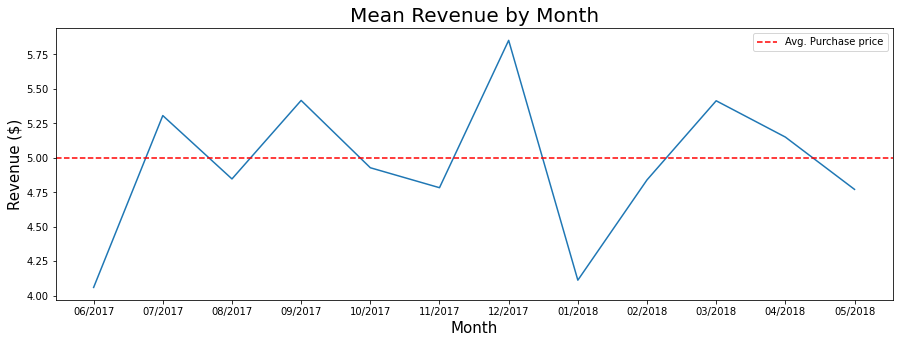

In [ ]:
# We'll show the data in form of a line plot

plt.figure(figsize=(15,5))
plt.plot(
    months,
    orders_by_month['revenue']
)
plt.axhline(average_purchase_size, color='r', linestyle='--', label = 'Avg. Purchase price')
plt.title('Mean Revenue by Month', fontsize = 20)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Revenue ($)', fontsize =15)
plt.legend()
plt.show()

#### Conclusion

##### The 2017-09 & 2017-12 cohorts bring in a lot of revenue! After December of 2017, each cohort's revenue is fairly low. What can we do to grow the revenue that is brought in?

## How much money do they bring? (LTV)

In [ ]:
orders.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_buy_ts_month buy_ts_month  
0         2017-06-01   2017-06-01  
1         2017-06-01   2017-06-01  
2         2017-06-01   2017-06-01  
3         2017-06-01   2017-06-01  
4         2017-06-01   2017-06-01

In [ ]:
cohort_sizes.head()

first_buy_ts_month   uid
0         2017-06-01  2023
1         2017-07-01  1923
2         2017-08-01  1370
3         2017-09-01  2581
4         2017-10-01  4340

In [ ]:
# first, get the revenue per cohort in each month
ltv_cohort = orders.groupby(['first_buy_ts_month', 'buy_ts_month'])['revenue'].sum().reset_index()
ltv_cohort.columns = ['first_buy_ts_month', 'buy_ts_month', 'revenue']

# merge with cohort size
ltv_cohort = ltv_cohort.merge(cohort_sizes, on=['first_buy_ts_month'])
ltv_cohort['age']=((ltv_cohort['buy_ts_month'] - ltv_cohort['first_buy_ts_month']) / np.timedelta64(1,'M')).round()
ltv_cohort['ltv']=ltv_cohort['revenue']/ltv_cohort['uid']
ltv_cohort

# calculate revenue per buyer

first_buy_ts_month buy_ts_month   revenue   uid  age       ltv
0          2017-06-01   2017-06-01   9557.49  2023  0.0  4.724414
1          2017-06-01   2017-07-01    981.82  2023  1.0  0.485329
2          2017-06-01   2017-08-01    885.34  2023  2.0  0.437637
3          2017-06-01   2017-09-01   1931.30  2023  3.0  0.954671
4          2017-06-01   2017-10-01   2068.58  2023  4.0  1.022531
..                ...          ...       ...   ...  ...       ...
74         2018-03-01   2018-05-01   1114.87  3533  2.0  0.315559
75         2018-04-01   2018-04-01  10600.69  2276  0.0  4.657597
76         2018-04-01   2018-05-01   1209.92  2276  1.0  0.531599
77         2018-05-01   2018-05-01  13925.76  2988  0.0  4.660562
78         2018-06-01   2018-06-01      3.42     1  0.0  3.420000

[79 rows x 6 columns]

In [ ]:
ltv_cohort_piv = ltv_cohort.pivot_table(
    index='first_buy_ts_month',
    columns='age',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

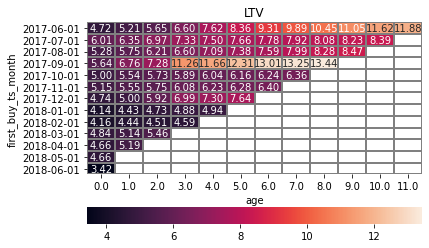

In [ ]:
ltv_cohort_piv.index = ltv_cohort_piv.index.astype(str)
sns.heatmap(ltv_cohort_piv, annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws={'orientation': 'horizontal'}).set(title='LTV')
plt.show()

In [ ]:
# now merging to the original dataset
orders_with_min_visit =orders.merge(min_visit, how='inner',on=['uid'])
orders_with_min_visit.head()

buy_ts  revenue                   uid        first_buy_ts  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

  first_buy_ts_month buy_ts_month       first_session              cohort  
0         2017-06-01   2017-06-01 2017-06-01 00:09:00 2017-06-01 00:09:00  
1         2017-06-01   2017-06-01 2017-06-01 00:14:00 2017-06-01 00:14:00  
2         2017-06-01   2017-06-01 2017-06-01 00:25:00 2017-06-01 00:25:00  
3         2017-06-01   2017-06-01 2017-06-01 00:14:00 2017-06-01 00:14:00  
4         2017-06-01   2017-06-01 2017-06-01 07:31:00 2017-06-01 07:31:00

#### Conclusion

##### LTV tends to go up overtime. That's really good! However, our initial LTV is trending downward with each new cohort. We need to figure out a way to get them to spend more money, sooner.

## How much money was spent? Overall, per source and over time.

In [ ]:
# for reference, here's our costs table
costs.head()

source_id       date  costs       year      month       week
0         1 2017-06-01  75.20 2017-01-01 2017-06-01 2017-06-01
1         1 2017-06-02  62.25 2017-01-01 2017-06-01 2017-06-01
2         1 2017-06-03  36.53 2017-01-01 2017-06-01 2017-06-01
3         1 2017-06-04  55.00 2017-01-01 2017-06-01 2017-06-01
4         1 2017-06-05  57.08 2017-01-01 2017-06-01 2017-06-01

In [ ]:
# sorting by the date & source_id
costs = costs.sort_values(by=['date', 'source_id'])
costs.head()

source_id       date   costs       year      month       week
0            1 2017-06-01   75.20 2017-01-01 2017-06-01 2017-06-01
363          2 2017-06-01  132.56 2017-01-01 2017-06-01 2017-06-01
726          3 2017-06-01  349.38 2017-01-01 2017-06-01 2017-06-01
1089         4 2017-06-01   76.74 2017-01-01 2017-06-01 2017-06-01
1452         5 2017-06-01   73.24 2017-01-01 2017-06-01 2017-06-01

In [ ]:
# First let's sum up the amount of money that was spent in the costs dataframe!

overall_money_spent = costs['costs'].sum()
print('Overall Money Spent: ', overall_money_spent)

Overall Money Spent:  329131.62


In [ ]:
# now let's group the amount by source. 'source_id' is the column we're looking for.

money_spent_per_source = costs.groupby('source_id')['costs'].sum()
money_spent_per_source

source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

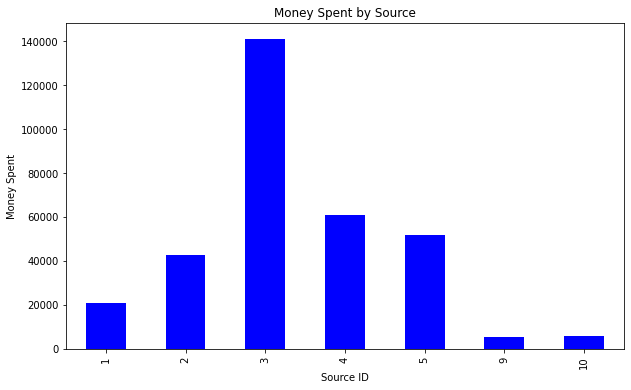

In [ ]:
# Plotting the money spent by source as a bar chart
plt.figure(figsize=(10, 6))
money_spent_per_source.plot(kind='bar', color='b')
plt.xlabel('Source ID')
plt.ylabel('Money Spent')
plt.title('Money Spent by Source')
plt.show()

##### Source ID #3 costs us the most money, by far.

In [ ]:
# we'll now group the data by date and aggregate the total cost
costs_over_time = costs.groupby('date').agg({'costs': 'sum'}).reset_index()

# rename the columns to reflect the data
costs_over_time.columns = ['date', 'total_cost']

In [ ]:
# show a line plot of the data!
plt.figure(figsize=(15, 5))
plt.plot(costs_over_time['date'], costs_over_time['total_cost'])
plt.xlabel('Date')
plt.ylabel('Cost')
plt.title('Marketing Costs Over Time')
plt.show()

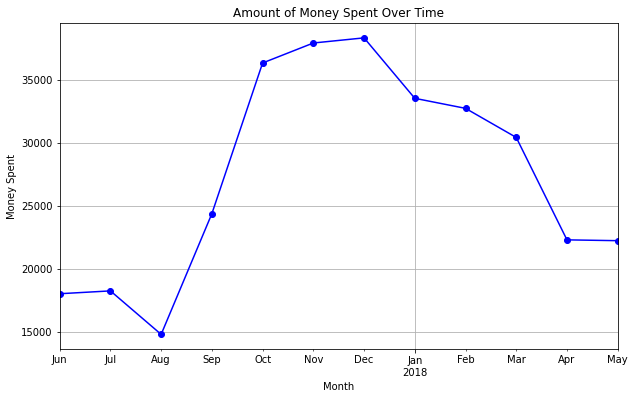

In [ ]:
# now let's plot this as a monthly chart!

# Group by month and calculate the sum of costs
money_spent_over_time = costs.groupby(costs['date'].dt.to_period('M'))['costs'].sum()

# Plotting the amount of money spent over time
plt.figure(figsize=(10, 6))
money_spent_over_time.plot(kind='line', marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Money Spent')
plt.title('Amount of Money Spent Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Grouping the source_id and aggregating the total costs.
costs_per_source_id = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()

# Renaming columns to better match the data.
costs_per_source_id.columns = ['source_id', 'total_cost']

In [ ]:
# Grouping data by date and aggregating the total cost.
costs_over_time = costs.groupby('date').agg({'costs':'sum'}).reset_index()

# Renaming the columns to better match the data.
costs_over_time.columns = ['date', 'total_cost']

In [ ]:
# here's an additional, more detailed, explanation of our costs
fig = px.line(
    costs,
    x='date',
    y='costs',
    color='source_id'
)
fig.show()

#### Conclusion

##### We spent, by far, the most on Source ID #3. As we can see from our Marketing Costs Over time graph, spending stays consistent with an occasional spike - here we see a large spike during the holiday season, and a spike going into the summer months.

## How much did customer acquisition from each of the sources cost?

In [ ]:
# start by finding total costs divided by the number of unique users
overall_cac = (costs['costs'].sum()/(orders['uid'].nunique())).round()
print('Overall CAC is: $', overall_cac)

Overall CAC is: $ 9.0


In [ ]:
# determine cost month is appropriate data type, aggregate cost_month by total costs for that month
costs['cost_month'] = costs['date'].astype('datetime64[M]')
costs_by_month = costs.groupby('cost_month').agg({'costs':'sum'}).reset_index()
costs_by_month.columns =['cost_month','total_costs']

In [ ]:
# create buyers_by_month dataframe with cost_month and number of buyers
buyers_by_month = orders.groupby('first_buy_ts_month').agg({'uid':'nunique'}).reset_index()
buyers_by_month.columns = ['cost_month', 'n_buyers']

In [ ]:
# in order to find cac_per_month, we'll merge costs_by_month and buyers_by_month
cac_per_month = pd.merge(
    costs_by_month,
    buyers_by_month,
    how = 'left',
    on = 'cost_month'
)

In [ ]:
# now we'll create a new column 
cac_per_month['cac'] = cac_per_month['total_costs']/cac_per_month['n_buyers']

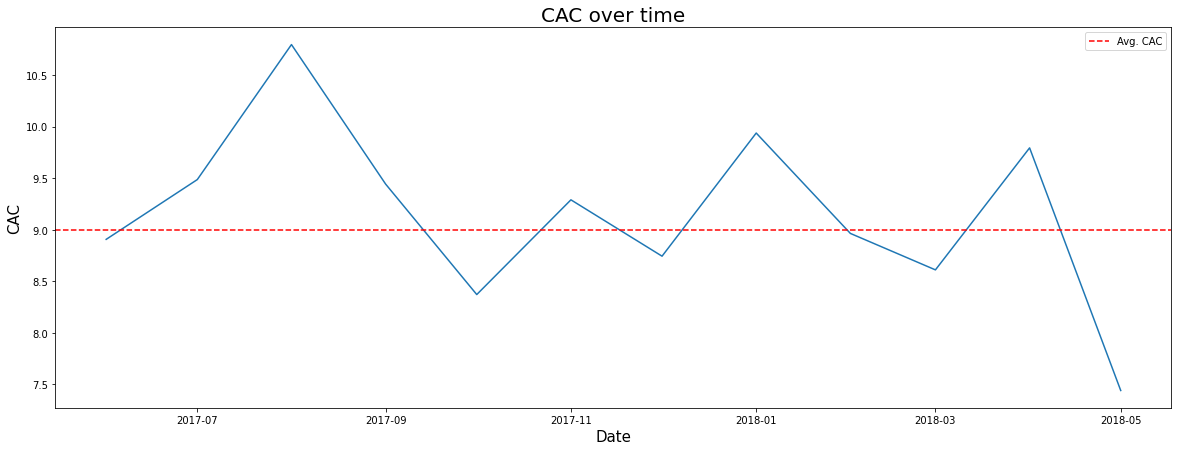

In [ ]:
# let's plot the CAC over time
plt.figure(figsize=(20,7))
plt.plot(
    cac_per_month['cost_month'],
    cac_per_month['cac']
)
plt.axhline(overall_cac, color='r', linestyle='--', label = 'Avg. CAC')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('CAC', fontsize = 15)
plt.title('CAC over time', fontsize = 20)
plt.legend()
plt.show()

In [ ]:
# we'll establish the first source the user came from as their designated source
first_source = visits_3.sort_values('session_date').groupby('uid').first()['source_id'].reset_index()
first_source.columns=['uid','first_source']

In [ ]:
# merging orders with first_source
orders = pd.merge(
    orders,
    first_source,
    on ='uid'
)

In [ ]:
# finding marketing costs per month by source
marketing_per_month_source = costs.groupby(['cost_month','source_id']).agg({'costs':'sum'}).reset_index()
marketing_per_month_source.columns = ['cost_month', 'source', 'total_cost']

In [ ]:
# finding number of buyers per month, by source
buyers_per_month_source = orders.groupby(['first_buy_ts_month', 'first_source']).agg({'uid':'nunique'}).reset_index()
buyers_per_month_source.columns = ['cost_month', 'source', 'buyers']

In [ ]:
# merging tables into new cac_per_month_source table
cac_per_month_source = pd.merge(
    marketing_per_month_source,
    buyers_per_month_source,
    on =['cost_month', 'source'],
    how = 'left'
)
cac_per_month_source['cac'] = cac_per_month_source['total_cost']/cac_per_month_source['buyers']

In [ ]:
# Now we can plot our graph!
fig = px.line(
    cac_per_month_source,
    x='cost_month',
    y='cac',
    color='source'
)

fig.show()

In [ ]:
# we'll create a dataframe that shows us how much money was spent on each source (we saw this in our visual above!)
costs_per_source = costs.groupby(['source_id'])['costs'].sum().reset_index()
costs_per_source.head()

source_id      costs
0         1   20833.27
1         2   42806.04
2         3  141321.63
3         4   61073.60
4         5   51757.10

In [ ]:
# displaying the cost per source each month
costs.pivot_table(
    index='month',
    columns='source_id',
    values='costs',
    aggfunc='sum'
)

source_id         1        2         3        4        5       9      10
month                                                                   
2017-06-01  1125.61  2427.38   7731.65  3514.80  2616.12  285.22  314.22
2017-07-01  1072.88  2333.11   7674.37  3529.73  2998.14  302.54  329.82
2017-08-01   951.81  1811.05   6143.54  3217.36  2185.28  248.93  232.57
2017-09-01  1502.01  2985.66   9963.55  5192.26  3849.14  415.62  460.67
2017-10-01  2315.75  4845.00  15737.24  6420.84  5767.40  609.41  627.24
2017-11-01  2445.16  5247.68  17025.34  5388.82  6325.34  683.18  792.36
2017-12-01  2341.20  4897.80  16219.52  7680.47  5872.52  657.98  645.86
2018-01-01  2186.18  4157.74  14808.78  5832.79  5371.52  547.16  614.35
2018-02-01  2204.48  4474.34  14228.56  5711.96  5071.31  551.50  480.88
2018-03-01  1893.09  3943.14  13080.85  5961.87  4529.62  480.29  526.41
2018-04-01  1327.49  2993.70   9296.81  4408.49  3501.15  373.49  388.25
2018-05-01  1467.61  2689.44   9411.42  4214.21  3669.56  362.17  409.86

#### Conclusion

##### Our monthly CAC appears to be slowly trending downwards - a good sign! That means it's cheaper to acquire new customers.

##### As expected, CAC per source is highest with source #3, and source #2 is not far behind.

##### Our acquisition costs per month go up aggressively in the winter months, it's likely a higher cost to advertise during the holiday months.

## How worthwhile where the investments? (ROI)

In [ ]:
# let's find the ROI of our CAC per month
cac_per_month_roi = cac_per_month[['cost_month','cac']]
cac_per_month_roi.columns = ['first_buy_ts_month', 'cac']
roi= pd.merge(
    ltv_cohort,
    cac_per_month_roi,
    on = 'first_buy_ts_month',
    how = 'left'
)

In [ ]:
# finding roi by dividing ltv by cac
roi['roi']=roi['ltv']/roi['cac']

In [ ]:
# creating a pivot table to find average ROI per cohort
roi_pivot = roi.pivot_table(
    index = 'first_buy_ts_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis=1).round(2)

In [ ]:
# changing datatype to string
roi_pivot.index=roi_pivot.index.astype('str')

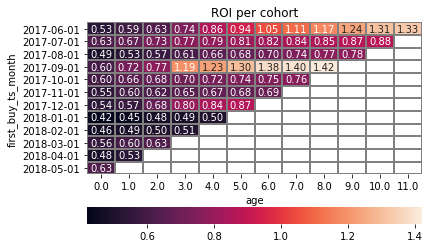

In [ ]:
# creating a heatmap to find ROI per cohort
sns.heatmap(
    roi_pivot,
    annot = True,
    fmt = '.2f',
    linewidths = 1,
    linecolor = 'grey',
    cbar_kws = {'orientation':'horizontal'}
).set(title='ROI per cohort')
plt.show()

##### Looks like ROI is slowly increasing to 1 overtime, as cohorts age. This is what we want!

In [ ]:
# now we'll find ltv per source
ltv_per_source = orders.groupby(['first_source'])['uid','revenue'].agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
ltv_per_source.columns = ['source', 'buyers', 'revenue']
ltv_per_source['ltv']=ltv_per_source['revenue']/ltv_per_source['buyers']

/tmp/ipykernel_127/1141393536.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# merging costs_per_source df with ltv_per_source to ultimately find ROMI
roi_per_source = pd.merge(
    costs_per_source_id,
    ltv_per_source,
    left_on = 'source_id',
    right_on = 'source'
)
roi_per_source['cac']=roi_per_source['total_cost']/roi_per_source['buyers']
roi_per_source['romi']=roi_per_source['ltv']/roi_per_source['cac']
roi_per_source

source_id  total_cost  source  buyers   revenue        ltv        cac  \
0          1    20833.27       1    3357  36938.86  11.003533   6.205919   
1          2    42806.04       2    3544  45063.61  12.715466  12.078454   
2          3   141321.63       3   10118  51279.94   5.068189  13.967348   
3          4    61073.60       4   10029  55532.14   5.537156   6.089700   
4          5    51757.10       5    7117  53411.33   7.504753   7.272320   
5          9     5517.49       9    1054   5491.83   5.210465   5.234810   
6         10     5822.49      10    1303   4338.27   3.329447   4.468526   

       romi  
0  1.773071  
1  1.052740  
2  0.362860  
3  0.909266  
4  1.031961  
5  0.995349  
6  0.745088

In [ ]:
# plotting this dataframe on a bar chart to find ROMI by source!
fig = px.bar(
    roi_per_source,
    x='source',
    y='romi',
    title='ROMI By Source'
)
fig.update_xaxes(type='category')
fig.show()

#### Conclusion

##### Source ID 1 acheives the highest ROMI. Source ID #3 has the lowest ROI - we really need to cut that source!

##### Source ID's 1, 2, & 5 all have a ROMI over 1. We should focus on those.

## Conclusion

##### After extensive analysis of the data, we have some obvious conclusions about where the marketing team should focus their resources.

##### Firstly, source #3 costs us, by far, the most money - and the return on that marketing investment is negative! Sources #1 and to a lesser extent #2 cost us less money, and yield a much higher return. Specifically, we recommend the marketing team focus most, if not all of the source #3 spend on source #1.

##### Source #10 is the most deeply negative return on marketing investment. We don't spend a lot of money on that source, but in the interest of focusing our resources, we should halt traffic from source #10 as it is returning the least! We can focus those resources on source #1 as well.

##### For traffic sources #5 and #9, the ROI is not huge, but our unit economics are in our favor, meaning we can ramp up our marketing resources there and expect to scale revenue proportionally.

##### We found the DAU, WAU, and MAU and plotted each of them. It's clear that our highest usage occurs in the winter months - November is the month with the highest usage. Summer months see about half the active users compared to winter months. Should we lean into campaigning in the winter months, or is there a promotion we can run to increase usage in the summer months?

##### To get more granular, we learned in our analysis that we typically see the most user activity on Mondays and specifically Thursdays. We can lean into this by increasing our marketing outreach on these days. We can also work to improve our LTV and retention rate by running promotions for existing users on the days where the most users are active (Mondays & Thursdays), or when users spend the most time with us (Fridays)

##### Looking at our average purchase size over time, we can see that users have the highest average spend during the Holiday months. We can ramp up our marketing resources through the channels mentioned above in the months coming up to the Holiday months, to maximize the retained users for their highest average spends. We see that our highest retention rates are between 1-5 months, so we'd want to begin to ramp up marketing late in the 3rd Quarter, before the 4th Quarter begins.

##### The mean revenue is 5.00

##### Sessions per user float between 1.2 - 1.4, so typically our users use our product about once per month. What can we do to convince users to come back more than once a month? Attacking the summer months seems like low-hanging fruit for a promotion of some sort.

##### Revenue and visits both fall drastically after the first month.

##### Overall CAC is consistant throughout the year.

##### ROI generally increases to 1 over time, which is essential for a profitable business.

##### Source_id #5 has the quickest conversion rate.

##### Source_id's #2 & #9 take the longest to convert, generally speaking.

##### The spring months are where we begin to see a drop in nearly all metrics.

##### The fall months are where we begin to see most of our metrics rise.

##### December provides us with a small bump in revenue.

##### All source ids cost about the same, except for #'s 2 & 3

##### Source id's #2 & #3 have the highest CAC.

##### Nearly all users who convert will do so within the first day.

##### This means the best time to convert users is the first day!

##### Website visits and revenue seem to move together.

##### More time is spent by users during the week, than the weekend. Friday has the longest session on average, and Sunday has the shortest!

##### Orders per buyer seems to be trending up throughout the lifetime of the average user. That's great!

##### LTV tends to go up overtime. That's really good! However, our initial LTV is trending downward with each new cohort. We need to figure out a way to get them to spend more money, sooner.

##### Costs were low in the summer, but that's followed by low usage by our users, and not a lot of revenue.

##### Because our ROMI is positive (above 1) for source IDs 1, 2, & 5, our unit economics are in our favor and these sources can be scaled. We should invest more into these acquisition sources during the summer months to bring on more users that will be more active & bring on more revenue in the winter months!

##### We should make it cheaper in the summer for users to use the product, we may incentivize more user activity and revenue.


#### Thank you so much for taking the time to read this analysis! We found many tangible ways to effectively improve our marketing spend, as well as found areas for improvement in terms of user retention and revenue.